<a href="https://colab.research.google.com/github/Andrewphanguyen/COGS108_Repo/blob/main/EDACheckpoint_group004.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**If you lost points on the last checkpoint you can get them back by responding to TA/IA feedback**  

Update/change the relevant sections where you lost those points, make sure you respond on GitHub Issues to your TA/IA to call their attention to the changes you made here.

Please update your Timeline... no battle plan survives contact with the enemy, so make sure we understand how your plans have changed.

# COGS 108 - EDA Checkpoint

# Names

- Akash Juwadi
- Andrew Nguyen
- Justin Hernandez
- Nathaniel Hernandez

# Research Question

How does country of origin affect a person's chances of winning a medal in an Olympic track and field events? Does this trend change when comparing sprinting, long distance running, and field events?

## Background and Prior Work

The Olympic Games is an international event hosted every 4 years and is a representation of unity between the nations who compete as they demonstrate their athletic performance as a country on the world stage. These were first held in ancient Greece starting in 776 BC, but the more modern rendition of the Olympics was not held until 1894, and the prestigious medals we know today were not distributed until 1904.<a id="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1) Our goal with this project is to analyze the medals received by the competing countries and dictate what presents a significant impact on an athlete's chances of earning a medal, with an emphasis on track and field events in particular.

From our research, we can see that not only GDP but the average temperature of a country can play a significant factor when it comes to the number of medals a country receives in the games depending on the sport.<a id="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2) This gives us a sense that GDP may not be the only significant factor when it comes to the success of an athlete in a country, which we will keep in mind when conducting our data analysis. Additionally, it is important to note that medal count is not the only thing we must consider when answering our question since other factors such as population density, athlete count, and historical factors can also play a role in determining an athleteâ€™s chances of success in their country.<a id="cite_ref-3"></a>[<sup>3</sup>](#cite_note-3) With all of these factors taken into consideration, this well prepares us to conduct our studies and ensure that we go into solving this question in the most effective way possible.

References:

1. <a id="cite_note-1"></a> [^](#cite_ref-1) https://olympics.com/en/news/the-history-of-the-olympic-games
2. <a id="cite_note-2"></a> [^](#cite_ref-2) https://scholarworks.calstate.edu/downloads/n870zt00q
3. <a id="cite_note-3"></a> [^](#cite_ref-3) https://scholarworks.calstate.edu/downloads/n870zt00q


# Hypothesis


We hypothesize that runners who are from more developed countries have a higher chance of getting a gold medal compared to other lower developed nations. This is because most contestants in Olympic Track and Field are either from those countries and have more resources and training to be able to prepare better for the competition.

# Data

## Data overview

- Dataset #1
  - Dataset Name: 120 years of Olympic history: athletes and results
  - Link to the dataset: https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results
  - Number of observations: 271116
  - Number of variables: 15
  - Description: Some of the important variables that we will be taking a look at more closely are the year, season, medals, and country of origin while the rest are unimportant to our analysis. There are strings used to store both the season, nationality and medals, but since we only care about the number of medals, we might convert these to a count of total medals. Ints are used for the year to represent which olympic games the medal was won in. Each row represents the particular medal that was won, but because we are more concerned with the nationality of these athletes who won the medals, we may have to change the overall structure of the rows as a result. There are also inconsistent values used for the results of a performance as well as names of athletes. But because these are not important to us, we can simply drop these from the dataframe to avoid errors.
- Dataset #2
  - Dataset Name: GDP(current US$)
  - Link to the dataset: https://data.worldbank.org/indicator/NY.GDP.MKTP.CD
  - Number of observations: 267
  - Number of variables: 5(GDP data is split into different columns based on year from 1960-2023)
  - Description: The important variables that we will be getting from this dataset will be the GDP of the country, the country name and the country code. This is because we will use the GDP to compare the differences between the two countries and use country name and country code to combine the GDP data with our datasets. In order to wrangle our data we would start by dropping the columns we are not using and melting the dataframe so every GDP entry in the dataframe as its own column
- Dataset #3
  - Dataset Name: Population
  - Link to the dataset: https://ourworldindata.org/population-growth
  - Number of observations: 18288
  - Number of variables: 40
  - Description: The significant variables for this dataset will be the population of the country, the country name, and the years of each country. This is because we will use the population to compare the differences between other countries. To wrangle our data we would start by dropping every variable except population, year, and country name and then melt the dataframe so every entry in the dataframe has its own population number each year from its own specific country.

In [20]:
## Libraries to install
%pip install pycountry

## These are the imports for our project
import pandas as pd
import numpy as np
import pycountry as pc
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

## Olympic Track & Field Results(Dataset #1)

In [24]:
# Reading in the Olympic CSV data
olympic_data = pd.read_csv("data/athlete_events.csv")

# Dropping unnecessary columns from the data
olympic_data = olympic_data.drop(["Name", "Age", "Height", "Weight", "Games", "City", "ID"], axis=1)

# Dropping duplicates from the data
olympic_data = olympic_data.drop_duplicates(keep='last')



In [25]:
# Removing any rows with null values
olympic_data.dropna(subset=['Medal'], inplace=True)

olympic_data

,Sex,Team,NOC,Year,Season,Sport,Event,Medal
37,M,Finland,FIN,1920,Summer,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,M,Finland,FIN,1920,Summer,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
41,M,Finland,FIN,1948,Summer,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
44,M,Finland,FIN,1948,Summer,Gymnastics,Gymnastics Men's Horse Vault,Gold
60,M,Norway,NOR,1992,Winter,Alpine Skiing,Alpine Skiing Men's Super G,Gold
...,...,...,...,...,...,...,...,...
271077,F,Soviet Union,URS,1956,Summer,Athletics,Athletics Women's Shot Put,Silver
271079,F,Soviet Union,URS,1964,Summer,Athletics,Athletics Women's Shot Put,Bronze
271081,M,Poland,POL,1980,Summer,Fencing,"Fencing Men's Foil, Team",Bronze
271101,F,Russia,RUS,2000,Summer,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze


In [26]:
# Creating a separate dataframe counting the number of medals won by each country each year in each season
medals_per_year = olympic_data.groupby(["Season", "Year", "Sex"])["NOC"].value_counts().reset_index(name="Count")



## GDP(current US$) (Dataset #2)

In [27]:
#import dataset
gdp = pd.read_csv("data/API_NY.GDP.PCAP.CD_DS2_en_csv_v2_100.csv")
gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,28419.264534,28449.712946,29329.081747,30918.483584,31902.809818,24008.127822,29127.759384,33300.838819,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1498.738230,1346.152564,1485.522597,1558.307482,1507.982881,1355.805923,1545.613215,1644.062829,NaN,NaN
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,62.369375,62.443703,60.950364,82.021738,85.511073,105.243196,...,566.881133,523.053012,526.140801,492.090632,497.741429,512.055098,355.777826,NaN,NaN,NaN
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,107.053706,112.128417,117.814663,122.370114,130.700278,137.301801,...,1882.264038,1648.762676,1590.277754,1735.374911,1812.446822,1688.075575,1766.943618,1785.312219,NaN,NaN
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3217.339244,1809.709377,2439.374441,2540.508878,2191.347764,1450.905112,1927.474078,3000.444231,NaN,NaN


In [33]:
#melt dataframe so each year has its own column
gdp_melted = gdp.melt(id_vars=["Country Name", "Country Code"],
                    var_name="Year",
                    value_name="GDP (current US$)")

#convert data to floats and ints
gdp_melted = gdp_melted[gdp_melted['Year'].str.isdigit()]
gdp_melted['Year'] = gdp_melted['Year'].astype(int)

#sort the data, reset index, and drop null values
gdp_sorted = gdp_melted.sort_values(by=['Country Name', 'Year'])
gdp_cleaned = gdp_sorted.dropna(subset=['GDP (current US$)'])
gdp_cleaned.reset_index(drop=True, inplace=True)
gdp_cleaned.head()



,Country Name,Country Code,Year,GDP (current US$)
0,Afghanistan,AFG,1960,62.369375
1,Afghanistan,AFG,1961,62.443703
2,Afghanistan,AFG,1962,60.950364
3,Afghanistan,AFG,1963,82.021738
4,Afghanistan,AFG,1964,85.511073


## Population (Dataset #3)

In [30]:
population_Data = pd.read_csv("data/population-and-demography.csv")

# Dropping unnecessary columns from the data
columns_index_to_drop = [3,4, 5, 6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39]
population_Data = population_Data.drop(population_Data.columns[columns_index_to_drop], axis=1)
#sort the data, reset index, and drop null values
pop_sorted = population_Data.sort_values(by=['Country name', 'Year'])
pop_cleaned = pop_sorted.dropna(subset=['Population'])
pop_cleaned.reset_index(drop=True, inplace=True)
pop_cleaned.head()


,Country name,Year,Population
0,Afghanistan,1950,7480464
1,Afghanistan,1951,7571542
2,Afghanistan,1952,7667534
3,Afghanistan,1953,7764549
4,Afghanistan,1954,7864289


After cleaning all three of our datasets above, we plan to represent each row in our final dataframe to represent a snapshot in time for a particular country of interest. That means for a valid row, we must have the medal count, GDP, and population size for the given year of that country. If there is data missing for any one of these values, we will drop the year for that country since it will not be significant for us to analyze. This means there will be countries less represented in our dataset due to a lack of information tracked by that country while others will have more of a presence in the dataset as a result.

# Results

## Exploratory Data Analysis

Carry out whatever EDA you need to for your project.  Because every project will be different we can't really give you much of a template at this point. But please make sure you describe the what and why in text here as well as providing interpretation of results and context.

### Merge Data at Year and Country

We will take the time to merge the data together to get a single dataframe to work with for our EDA.

In [34]:
# Dictionary mapping ISO alpha-3 country codes to NOC codes
iso_to_noc = {
    'AFG': 'AFG', 'ALB': 'ALB', 'DZA': 'ALG', 'AND': 'AND', 'AGO': 'ANG', 'AIA': 'AIA', 'ALA': 'ALA', 'ALB': 'ALB', 'AND': 'AND', 'ARE': 'UAE', 'ARG': 'ARG', 'ARM': 'ARM', 'ASM': 'ASA',
    'ATA': 'ATA', 'ATF': 'ATF', 'ATG': 'ANT', 'AUS': 'AUS', 'AUT': 'AUT', 'AZE': 'AZE', 'BDI': 'BDI', 'BEL': 'BEL', 'BEN': 'BEN', 'BES': 'BES', 'BFA': 'BUR', 'BGD': 'BAN', 'BGR': 'BUL',
    'BHR': 'BRN', 'BHS': 'BAH', 'BIH': 'BIH', 'BLM': 'BLM', 'BLR': 'BLR', 'BLZ': 'BIZ', 'BMU': 'BER', 'BOL': 'BOL', 'BRA': 'BRA', 'BRB': 'BAR', 'BRN': 'BRU', 'BTN': 'BHU', 'BVT': 'BOU',
    'BWA': 'BOT', 'CAF': 'CAF', 'CAN': 'CAN', 'CCK': 'CCK', 'CHE': 'SUI', 'CHL': 'CHI', 'CHN': 'CHN', 'CIV': 'CIV', 'CMR': 'CMR', 'COD': 'COD', 'COG': 'CGO', 'COK': 'COK', 'COL': 'COL',
    'COM': 'COM', 'CPV': 'CPV', 'CRI': 'CRC', 'CUB': 'CUB', 'CUW': 'CUW', 'CXR': 'CXR', 'CYM': 'CAY', 'CYP': 'CYP', 'CZE': 'CZE', 'DEU': 'GER', 'DJI': 'DJI', 'DMA': 'DMA', 'DNK': 'DEN',
    'DOM': 'DOM', 'DZA': 'ALG', 'ECU': 'ECU', 'EGY': 'EGY', 'ERI': 'ERI', 'ESH': 'ESH', 'ESP': 'ESP', 'EST': 'EST', 'ETH': 'ETH', 'FIN': 'FIN', 'FJI': 'FIJ', 'FLK': 'FLK', 'FRA': 'FRA',
    'FRO': 'FRO', 'FSM': 'FSM', 'GAB': 'GAB', 'GBR': 'GBR', 'GEO': 'GEO', 'GGY': 'GGY', 'GHA': 'GHA', 'GIB': 'GIB', 'GIN': 'GUI', 'GLP': 'GLP', 'GMB': 'GAM', 'GNB': 'GBS', 'GNQ': 'GEQ',
    'GRC': 'GRE', 'GRD': 'GRN', 'GRL': 'GRL', 'GTM': 'GUA', 'GUF': 'GUF', 'GUM': 'GUM', 'GUY': 'GUY', 'HKG': 'HKG', 'HMD': 'HMD', 'HND': 'HON', 'HRV': 'CRO', 'HTI': 'HAI', 'HUN': 'HUN',
    'IDN': 'INA', 'IMN': 'IMN', 'IND': 'IND', 'IOT': 'IOT', 'IRL': 'IRL', 'IRN': 'IRI', 'IRQ': 'IRQ', 'ISL': 'ISL', 'ISR': 'ISR', 'ITA': 'ITA', 'JAM': 'JAM', 'JEY': 'JEY', 'JOR': 'JOR',
    'JPN': 'JPN', 'KAZ': 'KAZ', 'KEN': 'KEN', 'KGZ': 'KGZ', 'KHM': 'CAM', 'KIR': 'KIR', 'KNA': 'SKN', 'KOR': 'KOR', 'KWT': 'KUW', 'LAO': 'LAO', 'LBN': 'LIB', 'LBR': 'LBR', 'LBY': 'LBA',
    'LCA': 'LCA', 'LIE': 'LIE', 'LKA': 'SRI', 'LSO': 'LES', 'LTU': 'LTU', 'LUX': 'LUX', 'LVA': 'LAT', 'MAC': 'MAC', 'MAF': 'MAF', 'MAR': 'MAR', 'MCO': 'MON', 'MDA': 'MDA', 'MDG': 'MAD',
    'MDV': 'MDV', 'MEX': 'MEX', 'MHL': 'MHL', 'MKD': 'MKD', 'MLI': 'MLI', 'MLT': 'MLT', 'MMR': 'MYA', 'MNE': 'MNE', 'MNG': 'MGL', 'MNP': 'NMI', 'MOZ': 'MOZ', 'MRT': 'MTN', 'MSR': 'MSR',
    'MTQ': 'MTQ', 'MUS': 'MRI', 'MWI': 'MAW', 'MYS': 'MAS', 'MYT': 'MYT', 'NAM': 'NAM', 'NCL': 'NCL', 'NER': 'NIG', 'NFK': 'NFK', 'NGA': 'NGR', 'NIC': 'NCA', 'NIU': 'NIU', 'NLD': 'NED',
    'NOR': 'NOR', 'NPL': 'NEP', 'NRU': 'NRU', 'NZL': 'NZL', 'OMN': 'OMA', 'PAK': 'PAK', 'PAN': 'PAN', 'PCN': 'PCN', 'PER': 'PER', 'PHL': 'PHI', 'PLW': 'PLW', 'PNG': 'PNG', 'POL': 'POL',
    'PRI': 'PUR', 'PRK': 'PRK', 'PRT': 'POR', 'PRY': 'PAR', 'PSE': 'PLE', 'PYF': 'PYF', 'QAT': 'QAT', 'REU': 'REU', 'ROU': 'ROU', 'RUS': 'RUS', 'RWA': 'RWA', 'SAU': 'KSA', 'SDN': 'SUD',
    'SEN': 'SEN', 'SGP': 'SGP', 'SGS': 'SGS', 'SHN': 'SHN', 'SJM': 'SJM', 'SLB': 'SOL', 'SLE': 'SLE', 'SLV': 'ESA', 'SMR': 'SMR', 'SOM': 'SOM', 'SPM': 'SPM', 'SRB': 'SRB', 'SSD': 'SSD', 'STP': 'STP', 'SUR': 'SUR',
    'SVK': 'SVK', 'SVN': 'SLO', 'SWE': 'SWE', 'SWZ': 'SWZ', 'SXM': 'SXM', 'SYC': 'SEY', 'SYR': 'SYR', 'TCA': 'TCA', 'TCD': 'CHA', 'TGO': 'TOG', 'THA': 'THA', 'TJK': 'TJK', 'TKL': 'TKL',
    'TKM': 'TKM', 'TLS': 'TLS', 'TON': 'TGA', 'TTO': 'TTO', 'TUN': 'TUN', 'TUR': 'TUR', 'TUV': 'TUV', 'TWN': 'TPE', 'TZA': 'TAN', 'UGA': 'UGA', 'UKR': 'UKR', 'UMI': 'UMI', 'URY': 'URU',
    'USA': 'USA', 'UZB': 'UZB', 'VAT': 'VAT', 'VCT': 'VIN', 'VEN': 'VEN', 'VGB': 'IVB', 'VIR': 'ISV', 'VNM': 'VIE', 'VUT': 'VAN', 'WLF': 'WLF', 'WSM': 'SAM', 'YEM': 'YEM', 'ZAF': 'RSA',
    'ZMB': 'ZAM', 'ZWE': 'ZIM'
}
gdp_cleaned['Country Code'] = gdp_cleaned['Country Code'].map(iso_to_noc)
merged_df = pd.merge(medals_per_year, gdp_cleaned, left_on=['NOC', 'Year'], right_on=['Country Code', 'Year'], how='left')
merged_df = merged_df[['NOC', 'Year', 'Season', 'Sex', 'Count', 'GDP (current US$)']]
merged_df.rename(columns={'GDP (current US$)': 'GDP'}, inplace=True)


<ipython-input-34-58f779025f97>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_cleaned['Country Code'] = gdp_cleaned['Country Code'].map(iso_to_noc)


In [35]:
# Now we have to change the Country Names in the Population Data to ISO format which we can convert to NOC
def change_to_country_code(x):
    try:
        return pc.countries.lookup(x).alpha_3
    except:
        return None
pop_cleaned["Country name"] = pop_cleaned["Country name"].apply(change_to_country_code)
pop_cleaned["Country name"] = pop_cleaned["Country name"].map(iso_to_noc)
merged_df = pd.merge(merged_df, pop_cleaned, left_on=['NOC', 'Year'], right_on=['Country name', 'Year'], how='left')
merged_df = merged_df[['NOC', 'Year', 'Season','Sex', 'Count', 'GDP', 'Population']]


In [36]:
# Dropping any rows that have N/A in either the GDP or Population columns
merged_df.dropna(subset=['GDP', 'Population'], inplace=True)
merged_df.reset_index(drop=True, inplace=True)
merged_df['GDP'] = merged_df['GDP'].astype(float)
merged_df['Population'] = merged_df['Population'].astype(int)
merged_df['Count'] = merged_df['Count'].astype(int)
merged_df.head()

,NOC,Year,Season,Sex,Count,GDP,Population
0,USA,1960,Summer,F,12,3007.123445,176188580
1,GBR,1960,Summer,F,8,1397.594803,52543024
2,AUS,1960,Summer,F,5,1810.597443,10286648
3,ITA,1960,Summer,F,2,804.492623,49517708
4,NED,1960,Summer,F,2,1068.784587,11493124


<ipython-input-37-1d0c71de5ae4>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(merged_df["Count"], merged_df["GDP"], s=merged_df["Population"].apply(lambda x: x * 0.0000005), alpha=0.5, cmap='viridis')


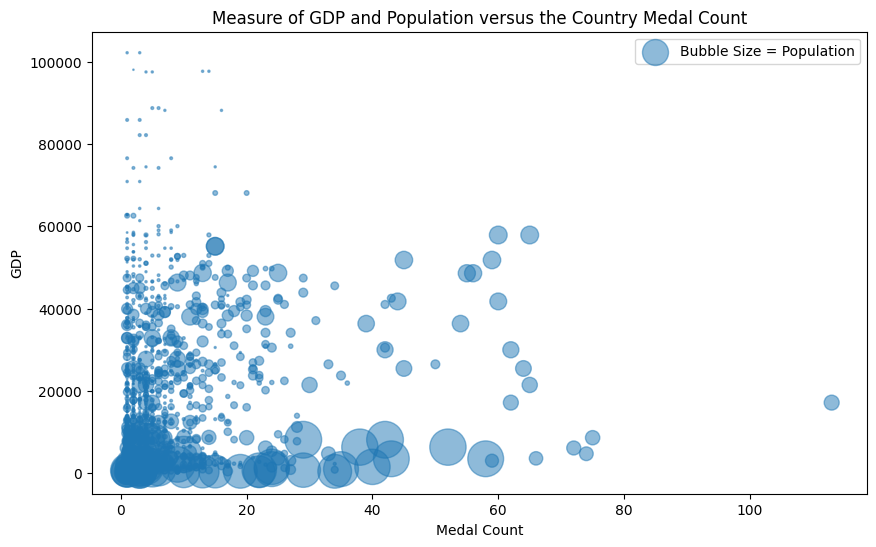

In [37]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(merged_df["Count"], merged_df["GDP"], s=merged_df["Population"].apply(lambda x: x * 0.0000005), alpha=0.5, cmap='viridis')
ax.set_xlabel('Medal Count')
ax.set_ylabel('GDP')
ax.set_title("Measure of GDP and Population versus the Country Medal Count")
ax.legend(["Bubble Size = Population"], loc='upper right')

### Section 2 of EDA if you need it  - please give it a better title than this

Some more words and stuff.  Remember notebooks work best if you interleave the code that generates a result with properly annotate figures and text that puts these results into context.

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     114.8
Date:                Sat, 01 Jun 2024   Prob (F-statistic):           2.93e-47
Time:                        00:54:16   Log-Likelihood:                -5687.6
No. Observations:                1578   AIC:                         1.138e+04
Df Residuals:                    1575   BIC:                         1.140e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5742      0.318     11.246      0.0

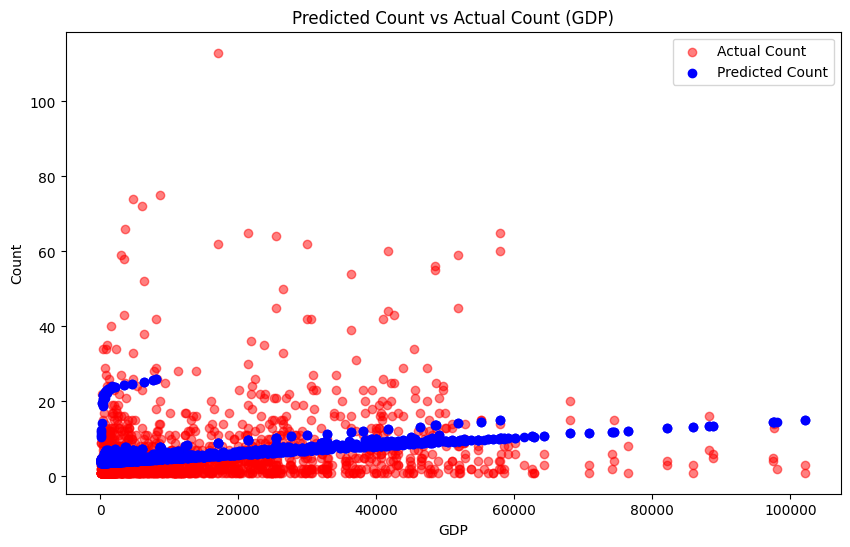

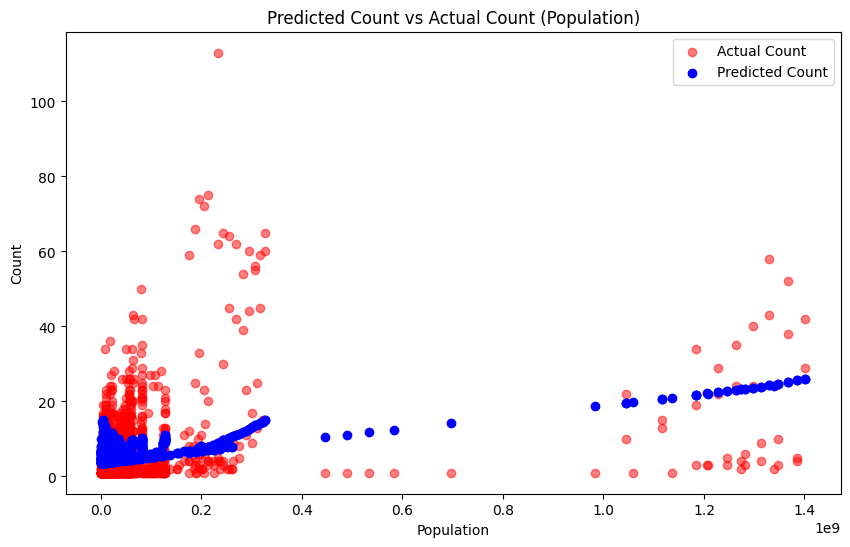

In [38]:
merged_df['GDP'] = merged_df['GDP'].astype(float)
merged_df['Population'] = merged_df['Population'].astype(int)
# Fit the linear regression model
linear_model = smf.ols('Count ~ GDP + Population', data=merged_df).fit()
# Summary of the regression
print(linear_model.summary())
# Predict the counts
merged_df['Predicted_Count'] = linear_model.predict(merged_df[['GDP', 'Population']])
plt.figure(figsize=(10, 6))
# Scatter plot of GDP vs Count
plt.scatter(merged_df['GDP'], merged_df['Count'], label='Actual Count', color='red', alpha=0.5)
plt.scatter(merged_df['GDP'], merged_df['Predicted_Count'], label='Predicted Count', color='blue')
plt.xlabel('GDP')
plt.ylabel('Count')
plt.title('Predicted Count vs Actual Count (GDP)')
plt.legend()
plt.show()
# Scatter plot of Population vs Count
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Population'], merged_df['Count'], label='Actual Count', color='red', alpha=0.5)
plt.scatter(merged_df['Population'], merged_df['Predicted_Count'], label='Predicted Count', color='blue')
plt.xlabel('Population')
plt.ylabel('Count')
plt.title('Predicted Count vs Actual Count (Population)')
plt.legend()
plt.show()

In [45]:
### Describe population

pop_cleaned.describe()




,Year,Population
count,18288.000000,1.828800e+04
mean,1985.500000,1.264704e+08
std,20.783173,5.888512e+08
min,1950.000000,1.363000e+03
25%,1967.750000,2.915915e+05
50%,1985.500000,3.833998e+06
75%,2003.250000,1.678546e+07
max,2021.000000,7.909295e+09


In [ ]:
###Description of population data
#Based on the data it shows that the average was about 1.26 x 10^8 throughout the years, 50% of the data has the population as 3.3 x 10^6,
#and the maximum amount of population was 7.9 x 10^9. Here the data showcases as the years go on the population increases.

In [49]:
### Describe medals_per_year data

medals_per_year.describe()

,Year,Count
count,2513.000000,2513.000000
mean,1978.470354,7.626741
std,30.950238,12.853348
min,1896.000000,1.000000
25%,1960.000000,1.000000
50%,1988.000000,3.000000
75%,2004.000000,8.000000
max,2016.000000,224.000000


In [ ]:
###Description of medals per year data
#the average medals per year was 7-8, 50% of the time the medal count per year was 3, and the maximum amount of medals was 224.
#Here it showcases how as the years increase and countries started developing, it led to a increase count of medals per year.

In [59]:
### Describe gdp
gdp_cleaned['GDP (current US$)'] = gdp_cleaned['GDP (current US$)'].astype(float)
gdp_cleaned.describe()

<ipython-input-59-e12904df4098>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_cleaned['GDP (current US$)'] = gdp_cleaned['GDP (current US$)'].astype(float)


,Year,GDP (current US$)
count,13182.000000,13182.000000
mean,1994.861402,8587.930735
std,17.358092,17086.009478
min,1960.000000,11.792676
25%,1981.000000,589.230952
50%,1997.000000,1987.157346
75%,2010.000000,8163.929290
max,2022.000000,240862.182448


In [ ]:
### Description of GDP data
#The average GDP each year was 8587, 50% of the time GDPgdp was 1987, and the max GDP was 240862.
#Here it showcases the increase GDP each year and as countries develop so did their GDP.

In [60]:
###Describe merged_df data
merged_df.describe()

,Year,Count,GDP,Population,Predicted_Count
count,1578.000000,1578.000000,1578.000000,1.578000e+03,1578.000000
mean,1995.513308,6.403676,15981.971617,6.899920e+07,6.403676
std,15.860085,9.523187,17773.355519,1.944289e+08,3.396569
min,1960.000000,1.000000,81.586947,2.344100e+04,3.646223
25%,1984.000000,1.000000,2365.647150,7.005296e+06,4.315575
50%,2000.000000,3.000000,8680.736469,1.553862e+07,5.299490
75%,2008.000000,7.000000,24841.780399,5.399543e+07,7.230547
max,2016.000000,113.000000,102175.919298,1.401890e+09,25.920627


In [ ]:
### Description of merged data
#The data shows that as years increase and the population increase so does the GDP and it ultimately led to a increase of medals per year
#which shows that their is a correlation between a countries status and their preformance in the olympic.

# Ethics & Privacy

Much of the information needed for this analysis largely relies on publicly available data. There will not be many privacy concerns as we will mostly be analyzing athleteâ€™s final performances through medal placements at olympic events. There will be no need to name specific athletes as we are more concerned with the countryâ€™s overall performance. Since we are looking at results and numerical data there will be little bias in our datasets. These results were collected based on the standings of every track and field event for the olympics so there is no room for opinions to form. However, it would be inequitable to not address potential bias towards economic strength between these countries which could potentially influence the overall outcome. We will take a look at the trends found between highest performing countries overall in medal counts and compare that with their 1st world and 3rd world status. Our way of handling this status will be dealt with in the future, but it most likely will deal with their GDP or the countryâ€™s status in the UN. Because our analysis will rely on numerical data and trends that arose from keeping track of medal placements, we will need to consider the data at face value and try not to be biased towards the United States and the way they appear in the results. As long as we are impartial in the way we see the results, there should be no concern for our conclusions.

# Team Expectations

* *Attend weekly meetings to discuss and work on the project.*
* *Comunicate with team members through canvas or discord about issues for the project.*
* *Complete assigned work by the deadline given by the group.*
* *Resolve conflict through majority vote/go to course staff if there is a major problem.*

# Project Timeline Proposal

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 4/25  |  2 PM | Read & Think about COGS 108 expectations; brainstorm topics/questions  | Determine best form of communication; Discuss and decide on final project topic; discuss hypothesis; begin background research |
| 5/2  |  2 PM |  Do background research on topic | Discuss ideal dataset(s) and ethics; draft project proposal;submit proposal |
| 5/9  | 2 PM  | Import & Wrangle Data  | Meeting canceled |
| 5/16  | 2 PM  | Get Familierized with data; Start EDA  | Complete project check-in #1; Review/Edit wrangling/EDA; Discuss Analysis Plan   |
| 5/23  | 2 PM  | Finalize wrangling/EDA; Begin Analysis | Discuss/edit Analysis;Finalize EDA |
| 5/30  | 2 PM  | Complete analysis; Draft results/conclusion/discussion| Complete project check-in #2, Discuss/edit full project |
| 6/6  | 2 PM  | Edit full project | Final review of project; Turn in Final Project & Group Project Surveys |